In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#notebook setting to display all the rowns and columns to have better clarity on the data 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [4]:
#Reading and Checking the dataframe 
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
df.shape

(9240, 37)

In [8]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


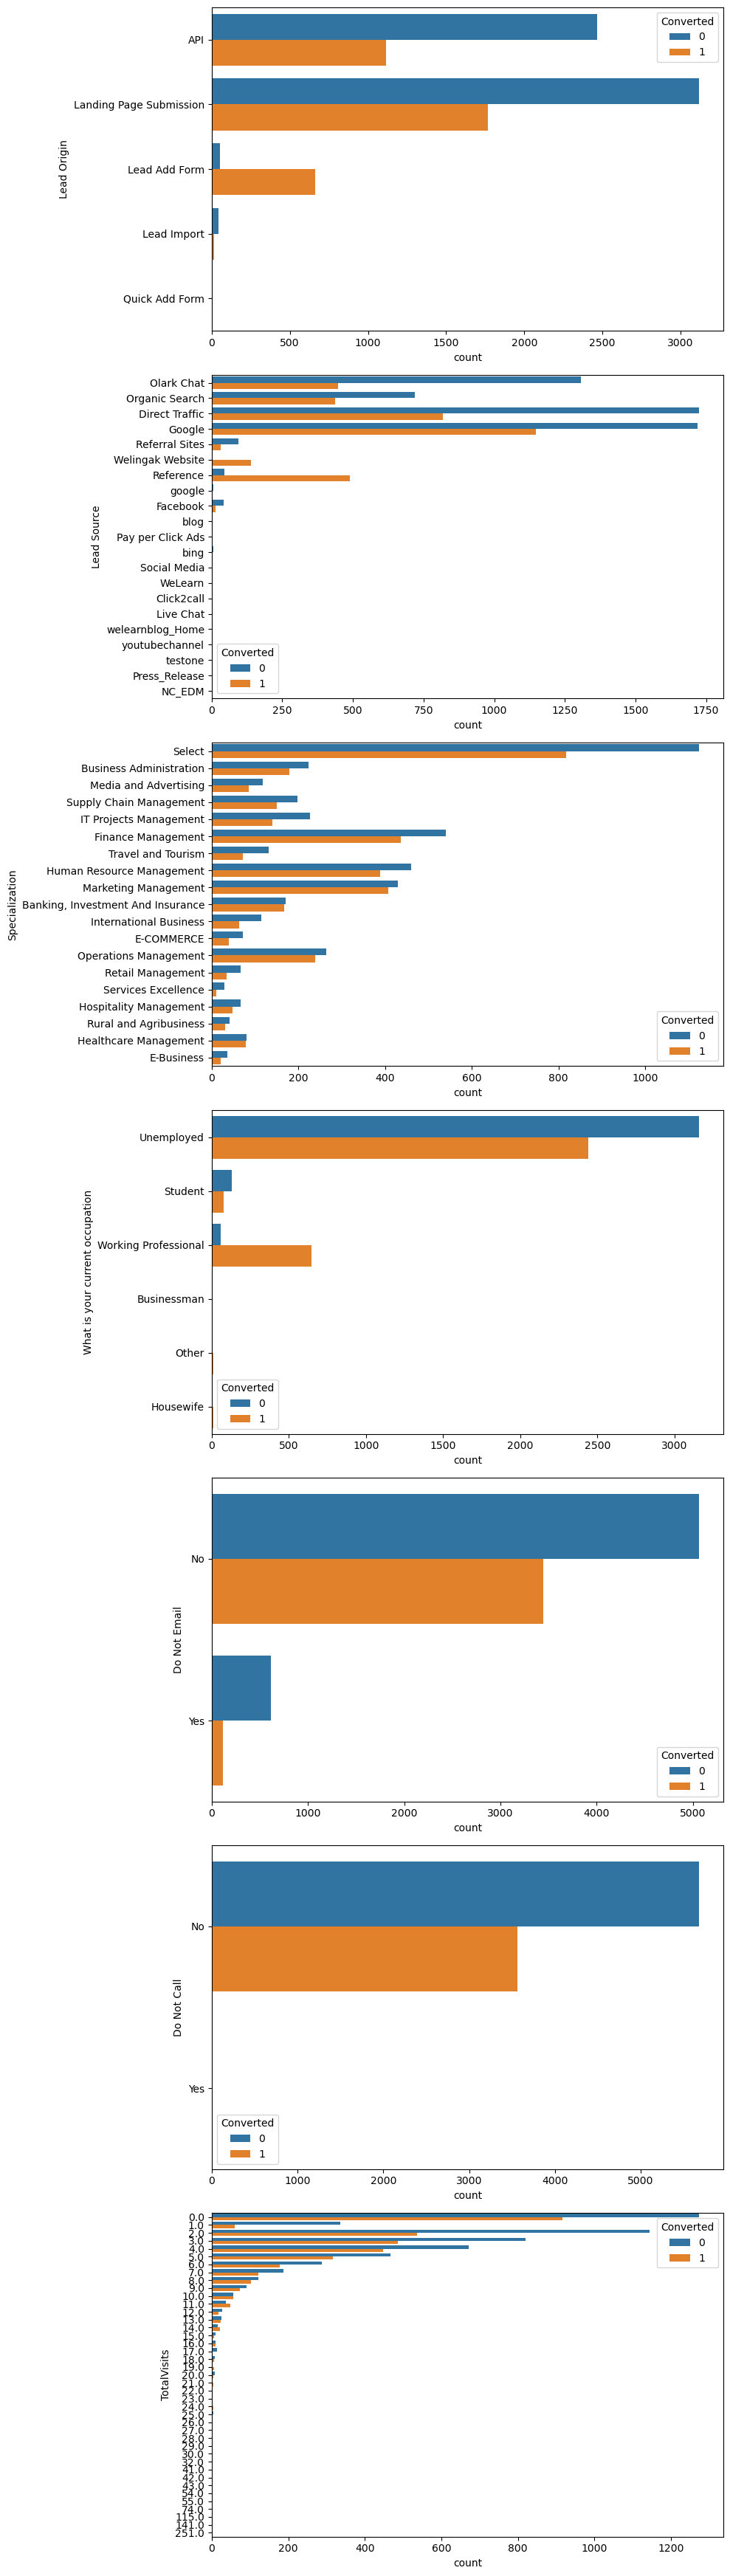

In [9]:
#Creating a list of relevant cols and checking their relation with "Converted" column

import math

cols = ['Lead Origin', 'Lead Source','Specialization', 'What is your current occupation', 'Do Not Email', 'Do Not Call',
        'TotalVisits']

# Number of subplots you need
num_plots = len(cols)

# Determine the number of rows and columns based on the number of subplots
cols_per_row = 1
rows = math.ceil(num_plots / cols_per_row)

plt.figure(figsize=(10,5 * rows))  # Adjust height based on number of rows

# Loop through each categorical column
for i, col in enumerate(cols, start=1):
    plt.subplot(rows, cols_per_row, i)  # Define a grid layout with enough rows
    sns.countplot(y=col, hue="Converted", data=df) 
    
plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()

Observations:

Majority of converted leads are originated from API landing page
Majority of converted lead source comes from google and direct traffic
Apart from Select, majority of the leads that are converted have selected Finance Management as their Specialisation
Majortiy of the converted leads are unemployed
Majority of the converted for do not call and do not email as No

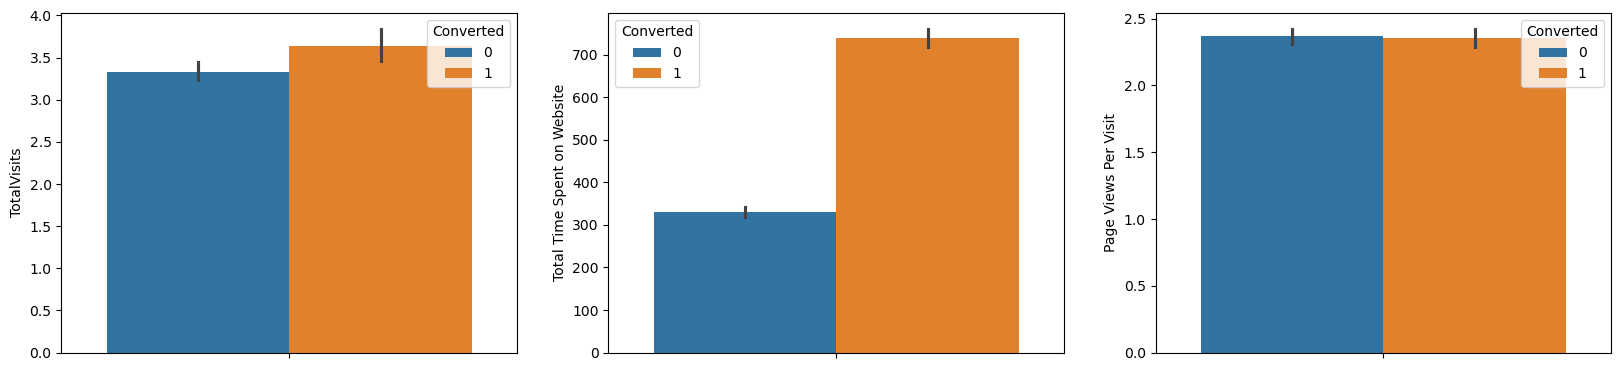

In [11]:
#Understanding the Lead Conversion on TotalVisits, Total Time Spent on Website, Page Views Per Visit

plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.barplot(hue = 'Converted', y = 'TotalVisits', data = df)

plt.subplot(3,3,2)
sns.barplot(hue = 'Converted', y = 'Total Time Spent on Website',data = df)

plt.subplot(3,3,3)
sns.barplot(hue = 'Converted', y = 'Page Views Per Visit',data = df)

plt.show()

Observation: Majority of converted leads are converted from page views per visit

In [13]:
# Loop through each column in the DataFrame and print value counts
for col in df.columns:
    print(f"Value counts for column: {col}")
    print(df[col].value_counts())
    print("-" * 40)  # Separator for better readability between columns

Value counts for column: Prospect ID
Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64
----------------------------------------
Value counts for column: Lead Number
Lead Number
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: count, Length: 9240, dtype: int64
----------------------------------------
Value counts for column: Lead Origin
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
L

In [14]:
#Removing columns containing only "No" and columns which are not needed for modeling.
cols_not_reqd = ['Prospect ID', 'Lead Number', 'Country', 'Receive More Updates About Our Courses',
              'Update me on Supply Chain Content', 'Get updates on DM Content', 'City',
              'I agree to pay the amount through cheque','Magazine']

df = df.drop(cols_not_reqd, axis=1)

In [15]:
df.shape

(9240, 28)

In [16]:
# Loop through each column and check if "Select" is present
for col in df.columns:
    if (df[col] == "Select").any():
        print(f'Column "{col}" contains the value "Select".')

Column "Specialization" contains the value "Select".
Column "How did you hear about X Education" contains the value "Select".
Column "Lead Profile" contains the value "Select".


In [17]:
#Replacing Select as NaN
for col in df.columns:
    df[col] = df[col].replace("Select", np.nan)

In [18]:
#Checking if the Select is replaced with NaN
for col in df.columns:
    if (df[col] == "Select").any():
        print(f'Column "{col}" contains the value "Select".')

In [19]:
#Checking null values percentage for all columns 
round(100*(df.isnull().sum()/len(df)),1)

Lead Origin                                       0.0
Lead Source                                       0.4
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.5
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.5
Last Activity                                     1.1
Specialization                                   36.6
How did you hear about X Education               78.5
What is your current occupation                  29.1
What matters most to you in choosing a course    29.3
Search                                            0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                                         0.0
Digital Advertisement                             0.0
Through Recommendations     

In [20]:
#Dropping columsn with null values>40%
cols_40 = ["How did you hear about X Education" , "Lead Quality" , "Lead Profile" , "Asymmetrique Activity Index" , "Asymmetrique Profile Index" , 
           "Asymmetrique Activity Score" , "Asymmetrique Profile Score"]

df = df.drop(cols_40, axis=1)

In [21]:
df.shape

(9240, 21)

In [22]:
#Checking columns above 0 and below 40 
cols_below_40 = list(round(100*(df.isnull().sum()/len(df.index)), 2)[round(100*(df.isnull().sum()/len(df.index)), 2) > 0].index)
cols_below_40

['Lead Source',
 'TotalVisits',
 'Page Views Per Visit',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags']

In [23]:
#Dealing with Lead Source column 
df["Lead Source"].value_counts()

#Imputing with most occuring value i.e. mode "Google"
df["Lead Source"].fillna("Google", inplace=True)

In [24]:
df["Lead Source"].isnull().sum()

0

In [25]:
#Dealing with Totsl visits column 
df["TotalVisits"].value_counts()

#Checking median and imputing the column's null values w it.
df["TotalVisits"].median()

#Imputing with median "3.0"
df["TotalVisits"].fillna("3.0", inplace=True)

In [26]:
df["TotalVisits"].isnull().sum()

0

In [27]:
#Dealing with Page Views Per Visit column 
df["Page Views Per Visit"].value_counts()

#Checking median and imputing the column's null values w it.
df["Page Views Per Visit"].median()

#Imputing with median "2.0"
df["Page Views Per Visit"].fillna("2.0", inplace=True)

In [28]:
df["Page Views Per Visit"].isnull().sum()

0

In [29]:
#Dealing with Last Activity column 
df["Last Activity"].value_counts()

#Imputing with most occuring value i.e. mode "Email Opened"
df["Last Activity"].fillna("Email Opened", inplace=True)

In [30]:
df["Last Activity"].isnull().sum()

0

In [31]:
#Dealing with "Specialization" column 
df["Specialization"].value_counts()

df["Specialization"].isnull().sum()

3380

In [32]:
#Since 3380 is a big value, imputing it with mode would be incorrect, so rpelacing it with "Missing" 
df["Specialization"].fillna("Missing", inplace=True)

In [33]:
#Dealing with "What is you current occupation" column 
df["What is your current occupation"].value_counts()

df["What is your current occupation"].isnull().sum()

2690

In [34]:
#Since 2690 is a big value, imputing it with mode would be incorrect, so rpelacing it with "Unknown" 
df["What is your current occupation"].fillna("Unknown", inplace=True)

In [35]:
#Dealing with "What is you current occupation" column 
df["What matters most to you in choosing a course"].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [36]:
#This column is irrelavant and highly skewed hence dropping it 
df = df.drop("What matters most to you in choosing a course" , axis=1)

In [37]:
#Dealing with "Tags" Column 
df["Tags"].value_counts()

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

In [38]:
#Since 3353 is a big value, imputing it with mode would be incorrect, so rpelacing it with "Other" 
df["Tags"].fillna("Other", inplace=True)

In [39]:
#Checking null values percentage for all columns again
round(100*(df.isnull().sum()/len(df)),1)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
Tags                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [40]:
#Mapping Binary columns to 0 and 1 

varlist =  ['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums',
'Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [41]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Missing,Unemployed,0,0,0,0,0,0,Interested in other courses,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Missing,Unemployed,0,0,0,0,0,0,Ringing,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,0,0,0,0,0,Will revert after reading the email,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,0,0,0,0,0,Ringing,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Missing,Unemployed,0,0,0,0,0,0,Will revert after reading the email,0,Modified


In [42]:
#Outlier Analysis 

#Checking which column is numerical 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Lead Origin                             9240 non-null   object
 1   Lead Source                             9240 non-null   object
 2   Do Not Email                            9240 non-null   int64 
 3   Do Not Call                             9240 non-null   int64 
 4   Converted                               9240 non-null   int64 
 5   TotalVisits                             9240 non-null   object
 6   Total Time Spent on Website             9240 non-null   int64 
 7   Page Views Per Visit                    9240 non-null   object
 8   Last Activity                           9240 non-null   object
 9   Specialization                          9240 non-null   object
 10  What is your current occupation         9240 non-null   object
 11  Sear

In [43]:
#Dropping redundant columns before creating dummy variables for categorial columns with multiple categories 

red_cols = df[[ "Last Activity" , "Tags" , "Last Notable Activity"]] 

df = df.drop( red_cols , axis=1)

In [44]:
df.shape

(9240, 17)

We have total of 18 columns to work with now. 

In [46]:
df.dtypes

Lead Origin                               object
Lead Source                               object
Do Not Email                               int64
Do Not Call                                int64
Converted                                  int64
TotalVisits                               object
Total Time Spent on Website                int64
Page Views Per Visit                      object
Specialization                            object
What is your current occupation           object
Search                                     int64
Newspaper Article                          int64
X Education Forums                         int64
Newspaper                                  int64
Digital Advertisement                      int64
Through Recommendations                    int64
A free copy of Mastering The Interview     int64
dtype: object

In [47]:
#According to the data present in the columns Total Visits and Page views per visit, they should be a numerical column 

df['TotalVisits'] = pd.to_numeric(df['TotalVisits'])

In [48]:
df['Page Views Per Visit'] = pd.to_numeric(df['Page Views Per Visit'])

In [49]:
df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.079437,0.000216,0.385390,3.438636,487.698268,2.357440,0.001515,0.000216,0.000108,0.000108,0.000433,0.000758,0.312554
std,0.270435,0.014711,0.486714,4.819024,548.021466,2.145781,0.038898,0.014711,0.010403,0.010403,0.020803,0.027515,0.463559
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,5.000000,936.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
90%,0.000000,0.000000,1.000000,7.000000,1380.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
95%,1.000000,0.000000,1.000000,10.000000,1562.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
99%,1.000000,0.000000,1.000000,17.000000,1840.610000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


"TotalVisits" and "Page Views Per Visit" have outliers, we have to bin these before we proceed with one hot encoding method to create dummy variables. 
If we do not proceed with binning, it might result in several thousand columns and that will affect the modeling process (learnt that the hard way). 

In [51]:
#Dealing with 'TotalVisits' variable
# As we have range from 0 to 251 we will create bins according to that

# Defining bin edges and labels
bins = [-1, 0, 5, 10, 20, 30, 40, 50, 60, 75, 100, 150, 200, 251]
labels = ['TotalVisits_-1 to 0', 'TotalVisits_0 to 5', 'TotalVisits_5 to 10', 'TotalVisits_10 to 20', 'TotalVisits_20 to 30', 
          'TotalVisits_30 to 40', 'TotalVisits_40 to 50', 'TotalVisits_50 to 60', 'TotalVisits_60 to 75', 'TotalVisits_75 to 100', 
          'TotalVisits_100 to 150', 'TotalVisits_150 to 200', 'TotalVisits_200 to 251']

# Create bins and assign labels
df['TotalVisits'] = pd.cut(df['TotalVisits'], bins=bins, labels=labels, right=True)

In [52]:
df['TotalVisits'].value_counts()

TotalVisits
TotalVisits_0 to 5        5421
TotalVisits_-1 to 0       2189
TotalVisits_5 to 10       1277
TotalVisits_10 to 20       306
TotalVisits_20 to 30        37
TotalVisits_40 to 50         3
TotalVisits_50 to 60         2
TotalVisits_100 to 150       2
TotalVisits_30 to 40         1
TotalVisits_60 to 75         1
TotalVisits_200 to 251       1
TotalVisits_75 to 100        0
TotalVisits_150 to 200       0
Name: count, dtype: int64

In [53]:
#Dealing with Page Views Per Visit Column 

bins = [-1, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
labels = ['Page_Views_Per_Visit_-1 to 0', 'Page_Views_Per_Visit_0 to 5', 'Page_Views_Per_Visit_5 to 10', 'Page_Views_Per_Visit_10 to 15', 
          'Page_Views_Per_Visit_15 to 20', 'Page_Views_Per_Visit_20 to 25', 'Page_Views_Per_Visit_25 to 30', 'Page_Views_Per_Visit_30 to 35', 
          'Page_Views_Per_Visit_35 to 40', 'Page_Views_Per_Visit_40 to 45', 'Page_Views_Per_Visit_45 to 50', 'Page_Views_Per_Visit_50 to 55']

# Create bins and assign labels
df['Page Views Per Visit'] = pd.cut(df['Page Views Per Visit'], bins=bins, labels=labels, right=True)

In [54]:
df["Page Views Per Visit"].value_counts()

Page Views Per Visit
Page_Views_Per_Visit_0 to 5      6417
Page_Views_Per_Visit_-1 to 0     2189
Page_Views_Per_Visit_5 to 10      584
Page_Views_Per_Visit_10 to 15      45
Page_Views_Per_Visit_15 to 20       3
Page_Views_Per_Visit_20 to 25       1
Page_Views_Per_Visit_50 to 55       1
Page_Views_Per_Visit_25 to 30       0
Page_Views_Per_Visit_30 to 35       0
Page_Views_Per_Visit_35 to 40       0
Page_Views_Per_Visit_40 to 45       0
Page_Views_Per_Visit_45 to 50       0
Name: count, dtype: int64

In [113]:
#Checking how many categorical cols have multiple categories 

# Create a list of columns with more than 2 unique values (non-binary)

multi_cat_cols = df[['Lead Origin', 'Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Specialization', 'What is your current occupation']]

# Output the list
multi_cat_cols.head()

,Lead Origin,Lead Source,TotalVisits,Page Views Per Visit,Specialization,What is your current occupation
0,API,Olark Chat,TotalVisits_-1 to 0,Page_Views_Per_Visit_-1 to 0,Missing,Unemployed
1,API,Organic Search,TotalVisits_0 to 5,Page_Views_Per_Visit_0 to 5,Missing,Unemployed
2,Landing Page Submission,Direct Traffic,TotalVisits_0 to 5,Page_Views_Per_Visit_0 to 5,Business Administration,Student
3,Landing Page Submission,Direct Traffic,TotalVisits_0 to 5,Page_Views_Per_Visit_0 to 5,Media and Advertising,Unemployed
4,Landing Page Submission,Google,TotalVisits_0 to 5,Page_Views_Per_Visit_0 to 5,Missing,Unemployed


In [124]:
#Creating dummy variables

Lead_Origin = pd.get_dummies(df['Lead Origin'], drop_first=True , dtype=int)

Lead_Source = pd.get_dummies(df['Lead Source'], drop_first=True , dtype=int)

Total_Visits = pd.get_dummies(df['TotalVisits'], drop_first=True , dtype=int)

Page_Views_Per_Visit = pd.get_dummies(df['Page Views Per Visit'], drop_first=True , dtype=int)

Specialization = pd.get_dummies(df['Specialization'], drop_first=True , dtype=int)

What_is_your_current_occupation = pd.get_dummies(df['What is your current occupation'], drop_first=True , dtype=int)

In [126]:
#Concating the dummy variables with original df 

df = pd.concat([df,Lead_Origin,Lead_Source,Total_Visits,Page_Views_Per_Visit,Specialization,What_is_your_current_occupation], axis=1)
df.head(5)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,Direct Traffic,Facebook,Google,Live Chat,NC_EDM,Olark Chat,Organic Search,Pay per Click Ads,Press_Release,Reference,Referral Sites,Social Media,WeLearn,Welingak Website,bing,blog,google,testone,welearnblog_Home,youtubechannel,TotalVisits_0 to 5,TotalVisits_5 to 10,TotalVisits_10 to 20,TotalVisits_20 to 30,TotalVisits_30 to 40,TotalVisits_40 to 50,TotalVisits_50 to 60,TotalVisits_60 to 75,TotalVisits_75 to 100,TotalVisits_100 to 150,TotalVisits_150 to 200,TotalVisits_200 to 251,Page_Views_Per_Visit_0 to 5,Page_Views_Per_Visit_5 to 10,Page_Views_Per_Visit_10 to 15,Page_Views_Per_Visit_15 to 20,Page_Views_Per_Visit_20 to 25,Page_Views_Per_Visit_25 to 30,Page_Views_Per_Visit_30 to 35,Page_Views_Per_Visit_35 to 40,Page_Views_Per_Visit_40 to 45,Page_Views_Per_Visit_45 to 50,Page_Views_Per_Visit_50 to 55,Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Missing,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Housewife,Other,Student,Unemployed,Unknown,Working Professional
0,API,Olark Chat,0,0,0,TotalVisits_-1 to 0,0,Page_Views_Per_Visit_-1 to 0,Missing,Unemployed,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,API,Organic Search,0,0,0,TotalVisits_0 to 5,674,Page_Views_Per_Visit_0 to 5,Missing,Unemployed,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,TotalVisits_0 to 5,1532,Page_Views_Per_Visit_0 to 5,Business Administration,Student,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,TotalVisits_0 to 5,305,Page_Views_Per_Visit_0 to 5,Media and Advertising,Unemployed,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Landing Page Submission,Google,0,0,1,TotalVisits_0 to 5,1428,Page_Views_Per_Visit_0 to 5,Missing,Unemployed,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [132]:
#dropping the duplicate columns
df = df.drop(multi_cat_cols, axis=1) 

In [136]:
#Checking the final dataframe 
df.head()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,Direct Traffic,Facebook,Google,Live Chat,NC_EDM,Olark Chat,Organic Search,Pay per Click Ads,Press_Release,Reference,Referral Sites,Social Media,WeLearn,Welingak Website,bing,blog,google,testone,welearnblog_Home,youtubechannel,TotalVisits_0 to 5,TotalVisits_5 to 10,TotalVisits_10 to 20,TotalVisits_20 to 30,TotalVisits_30 to 40,TotalVisits_40 to 50,TotalVisits_50 to 60,TotalVisits_60 to 75,TotalVisits_75 to 100,TotalVisits_100 to 150,TotalVisits_150 to 200,TotalVisits_200 to 251,Page_Views_Per_Visit_0 to 5,Page_Views_Per_Visit_5 to 10,Page_Views_Per_Visit_10 to 15,Page_Views_Per_Visit_15 to 20,Page_Views_Per_Visit_20 to 25,Page_Views_Per_Visit_25 to 30,Page_Views_Per_Visit_30 to 35,Page_Views_Per_Visit_35 to 40,Page_Views_Per_Visit_40 to 45,Page_Views_Per_Visit_45 to 50,Page_Views_Per_Visit_50 to 55,Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Missing,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Housewife,Other,Student,Unemployed,Unknown,Working Professional
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,674,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,1532,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,305,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1428,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [138]:
df.shape

(9240, 82)

Train-test Split 

In [396]:
#Importing train_test_split library 
from sklearn.model_selection import train_test_split

In [398]:
# Putting feature variable to X
X = df.drop(["Converted"], axis=1)

X.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,Direct Traffic,Facebook,Google,Live Chat,NC_EDM,Olark Chat,Organic Search,Pay per Click Ads,Press_Release,Reference,Referral Sites,Social Media,WeLearn,Welingak Website,bing,blog,google,testone,welearnblog_Home,youtubechannel,TotalVisits_0 to 5,TotalVisits_5 to 10,TotalVisits_10 to 20,TotalVisits_20 to 30,TotalVisits_30 to 40,TotalVisits_40 to 50,TotalVisits_50 to 60,TotalVisits_60 to 75,TotalVisits_75 to 100,TotalVisits_100 to 150,TotalVisits_150 to 200,TotalVisits_200 to 251,Page_Views_Per_Visit_0 to 5,Page_Views_Per_Visit_5 to 10,Page_Views_Per_Visit_10 to 15,Page_Views_Per_Visit_15 to 20,Page_Views_Per_Visit_20 to 25,Page_Views_Per_Visit_25 to 30,Page_Views_Per_Visit_30 to 35,Page_Views_Per_Visit_35 to 40,Page_Views_Per_Visit_40 to 45,Page_Views_Per_Visit_45 to 50,Page_Views_Per_Visit_50 to 55,Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Missing,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Housewife,Other,Student,Unemployed,Unknown,Working Professional
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,674,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1532,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,305,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1428,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [400]:
# Putting response variable to y
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [402]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

Feature Scaling 

In [405]:
#Importing StandardScaler library 
from sklearn.preprocessing import StandardScaler

In [407]:
scaler = StandardScaler()

X_train[["Total Time Spent on Website"]] = scaler.fit_transform(X_train[["Total Time Spent on Website"]])

X_train.describe()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,Direct Traffic,Facebook,Google,Live Chat,NC_EDM,Olark Chat,Organic Search,Pay per Click Ads,Press_Release,Reference,Referral Sites,Social Media,WeLearn,Welingak Website,bing,blog,google,testone,welearnblog_Home,youtubechannel,TotalVisits_0 to 5,TotalVisits_5 to 10,TotalVisits_10 to 20,TotalVisits_20 to 30,TotalVisits_30 to 40,TotalVisits_40 to 50,TotalVisits_50 to 60,TotalVisits_60 to 75,TotalVisits_75 to 100,TotalVisits_100 to 150,TotalVisits_150 to 200,TotalVisits_200 to 251,Page_Views_Per_Visit_0 to 5,Page_Views_Per_Visit_5 to 10,Page_Views_Per_Visit_10 to 15,Page_Views_Per_Visit_15 to 20,Page_Views_Per_Visit_20 to 25,Page_Views_Per_Visit_25 to 30,Page_Views_Per_Visit_30 to 35,Page_Views_Per_Visit_35 to 40,Page_Views_Per_Visit_40 to 45,Page_Views_Per_Visit_45 to 50,Page_Views_Per_Visit_50 to 55,Business Administration,E-Business,E-COMMERCE,Finance Management,Healthcare Management,Hospitality Management,Human Resource Management,IT Projects Management,International Business,Marketing Management,Media and Advertising,Missing,Operations Management,Retail Management,Rural and Agribusiness,Services Excellence,Supply Chain Management,Travel and Tourism,Housewife,Other,Student,Unemployed,Unknown,Working Professional
count,6468.000000,6468.000000,6.468000e+03,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.0,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.0,6468.000000,6468.0,6468.000000,6468.00000,6468.000000,6468.000000,6468.000000,6468.000000,6468.0,6468.0,6468.0,6468.0,6468.0,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,0.078386,0.000309,-6.701161e-17,0.001701,0.000309,0.000155,0.000155,0.000464,0.001082,0.311843,0.528139,0.079468,0.005102,0.000155,0.271490,0.005102,0.320037,0.000309,0.000155,0.190167,0.121058,0.000155,0.000309,0.060297,0.014224,0.000309,0.000155,0.014069,0.000464,0.000155,0.000773,0.0,0.000155,0.000155,0.587817,0.136518,0.033859,0.004329,0.000155,0.000309,0.000155,0.000155,0.0,0.000309,0.0,0.000155,0.69496,0.063698,0.004638,0.000155,0.000155,0.0,0.0,0.0,0.0,0.0,0.000155,0.043599,0.005720,0.012987,0.105442,0.015615,0.013451,0.091682,0.037260,0.018707,0.093383,0.020563,0.367502,0.057205,0.010823,0.007267,0.004793,0.037570,0.021336,0.001391,0.001237,0.021027,0.605133,0.292672,0.077613
std,0.268799,0.017583,1.000077e+00,0.041207,0.017583,0.012434,0.012434,0.021533,0.032882,0.463282,0.499246,0.270489,0.071252,0.012434,0.444763,0.071252,0.466527,0.017583,0.012434,0.392463,0.326219,0.012434,0.017583,0.238054,0.118422,0.017583,0.012434,0.117786,0.021533,0.012434,0.027795,0.0,0.012434,0.012434,0.492266,0.343365,0.180880,0.065658,0.012434,0.017583,0.012434,0.012434,0.0,0.017583,0.0,0.012434,0.46046,0.244233,0.067952,0.012434,0.012434,0.0,0.0,0.0,0.0,0.0,0.012434,0.204218,0.075423,0.113227,0.307146,0.123991,0.115204,0.288599,0.189414,0.135500,0.290991,0.141926,0.482162,0.232251,0.103475,0.084940,0.069069,0.190168,0.144512,0.037279,0.035150,0.143484,0.488860,0.455024,0.267582
min,0.000000,0.000000,-8.853708e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [408]:
### Checking the coversion Rate
current_conversion_rate = (sum(df['Converted'])/len(df['Converted'].index))*100
current_conversion_rate

38.53896103896104

Inspecting Correlations 

In [412]:
#Importing neccesary libraries '
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

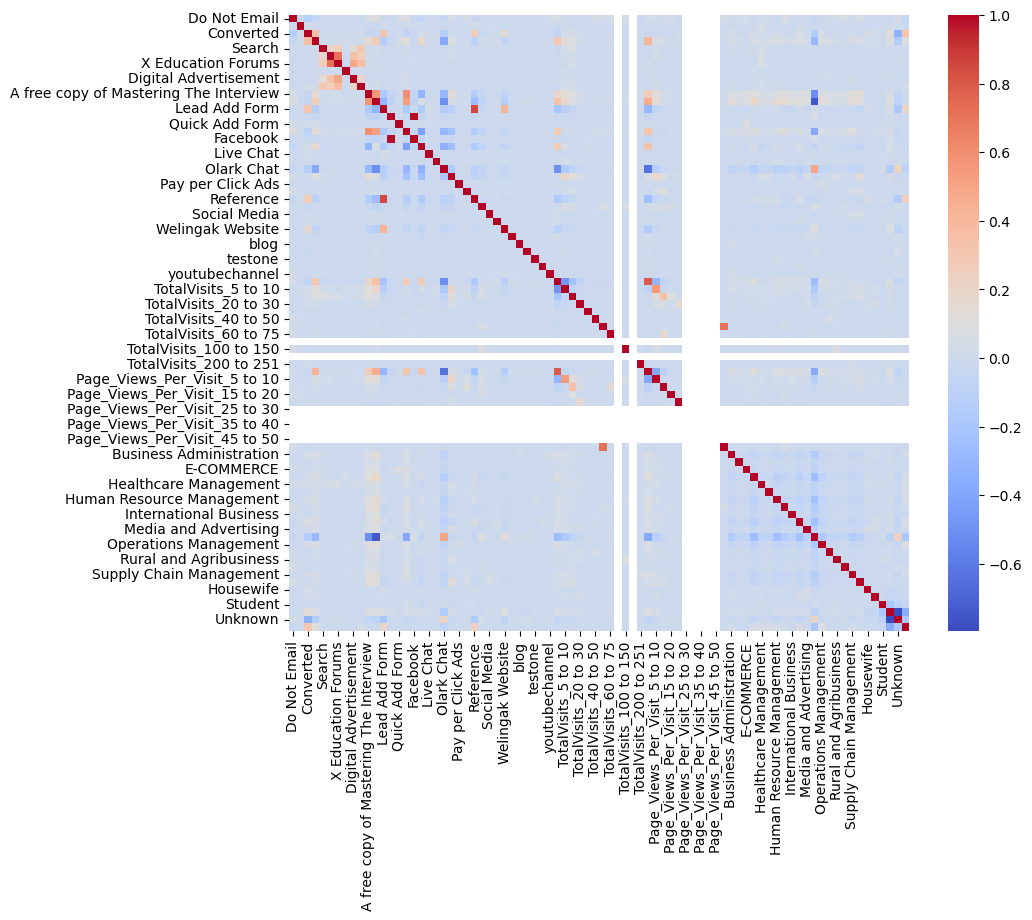

In [414]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt='.2f')
plt.show()

Model Building 

In [417]:
#Importing Necessary Library 
import statsmodels.api as sm

In [419]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6396
Model Family:                Binomial   Df Model:                           71
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 14 Sep 2024   Deviance:                   1.2673e+05
Time:                        11:17:08   Pearson chi2:                 6.20e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                   2.163e+15   4.97e+07   4.35e+07      0.000    2.16e+15    2.16e+15
Do Not Email                           -7.869e+14    3.2e+06  -2.46e+08      0.000   -7.87e+14   -7.87e+14
Do Not Call                             2.374e+15   4.77e+07   4.98e+07      0.000    2.37e+15    2.37e+15
Total Time Spent on Website             7.905e+14   9.85e+05   8.02e+08      0.000     7.9e+14     7.9e+14
Search                                 -5.396e+14   2.22e+07  -2.43e+07      0.000    -5.4e+14    -5.4e+14
Newspaper Article                      -7.889e+13   6.73e+07  -1.17e+06      0.000   -7.89e+13   -7.89e+13
X Education Forums                      3.356e+15   1.11e+08   3.02e+07      0.000    3.36e+15    3.36e+15
Newspaper                              -4.685e+15   6.73e+07  -6.96e+07      0.000   -4.69e+15   -4.69e+15
Digital Advertisement                  -5.393e+15   4.76e+07  -1.13e+08      0.000   -5.39e+15   -5.39e+15
Through Recommendations                 2.384e+14   2.85e+07   8.37e+06      0.000    2.38e+14    2.38e+14
A free copy of Mastering The Interview -1.878e+14   2.68e+06  -6.99e+07      0.000   -1.88e+14   -1.88e+14
Landing Page Submission                -1.228e+14   3.39e+06  -3.63e+07      0.000   -1.23e+14   -1.23e+14
Lead Add Form                           1.968e+14   1.33e+07   1.48e+07      0.000    1.97e+14    1.97e+14
Lead Import                            -2.219e+15   4.81e+07  -4.61e+07      0.000   -2.22e+15   -2.22e+15
Quick Add Form                          5.441e+15   6.77e+07   8.03e+07      0.000    5.44e+15    5.44e+15
Direct Traffic                         -1.374e+15    4.1e+07  -3.35e+07      0.000   -1.37e+15   -1.37e+15
Facebook                               -3.688e+13   6.31e+07  -5.85e+05      0.000   -3.69e+13   -3.69e+13
Google                                  -1.08e+15   4.09e+07  -2.64e+07      0.000   -1.08e+15   -1.08e+15
Live Chat                               3.871e+13   6.14e+07   6.31e+05      0.000    3.87e+13    3.87e+13
NC_EDM                                 -6.288e+14   7.86e+07  -7.99e+06      0.000   -6.29e+14   -6.29e+14
Olark Chat                             -1.267e+15   4.12e+07  -3.08e+07      0.000   -1.27e+15   -1.27e+15
Organic Search                         -1.241e+15    4.1e+07  -3.02e+07      0.000   -1.24e+15   -1.24e+15
Pay per Click Ads                      -4.397e+15   7.87e+07  -5.59e+07      0.000    -4.4e+15    -4.4e+15
Press_Release                          -3.753e+15   6.33e+07  -5.93e+07      0.000   -3.75e+15   -3.75e+15
Reference                              -7.971e+14    3.9e+07  -2.05e+07      0.000   -7.97e+14   -7.97e+14
Referral Sites                         -1.194e+15   4.16e+07  -2.87e+07      0.000   -1

Feature Selection using RFE 

In [421]:
#Importing Library 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [422]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Initialize the logistic regression model
logreg = LogisticRegression()

# Initialize RFE with the logistic regression model and the number of features to select
rfe = RFE(estimator=logreg, n_features_to_select=15)

# Fit the RFE model
rfe = rfe.fit(X_train, y_train)


In [423]:
rfe.support_

array([ True, False,  True, False, False, False, False, False, False,
       False,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True,  True, False, False,  True,  True])

In [424]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 45),
 ('Total Time Spent on Website', True, 1),
 ('Search', False, 59),
 ('Newspaper Article', False, 19),
 ('X Education Forums', False, 27),
 ('Newspaper', False, 2),
 ('Digital Advertisement', False, 13),
 ('Through Recommendations', False, 28),
 ('A free copy of Mastering The Interview', False, 34),
 ('Landing Page Submission', True, 1),
 ('Lead Add Form', True, 1),
 ('Lead Import', True, 1),
 ('Quick Add Form', False, 55),
 ('Direct Traffic', False, 14),
 ('Facebook', False, 4),
 ('Google', False, 39),
 ('Live Chat', False, 21),
 ('NC_EDM', False, 10),
 ('Olark Chat', False, 5),
 ('Organic Search', False, 58),
 ('Pay per Click Ads', False, 35),
 ('Press_Release', False, 22),
 ('Reference', False, 56),
 ('Referral Sites', False, 8),
 ('Social Media', False, 49),
 ('WeLearn', False, 23),
 ('Welingak Website', True, 1),
 ('bing', False, 16),
 ('blog', False, 42),
 ('google', False, 17),
 ('testone', False, 64),
 ('welearnblog_Home',

In [425]:
# storing selected(True) columns by RFE in a list
rfe_col = X_train.columns[rfe.support_]

# listing features removed by RFE feature selection
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview', 'Quick Add Form', 'Direct Traffic', 'Facebook', 'Google', 'Live Chat', 'NC_EDM', 'Olark Chat', 'Organic Search', 'Pay per Click Ads', 'Press_Release', 'Reference', 'Referral Sites', 'Social Media', 'WeLearn', 'bing', 'blog', 'google', 'testone', 'welearnblog_Home', 'youtubechannel', 'TotalVisits_0 to 5', 'TotalVisits_5 to 10', 'TotalVisits_10 to 20', 'TotalVisits_20 to 30', 'TotalVisits_30 to 40', 'TotalVisits_40 to 50', 'TotalVisits_50 to 60', 'TotalVisits_60 to 75', 'TotalVisits_75 to 100', 'TotalVisits_100 to 150', 'TotalVisits_150 to 200', 'TotalVisits_200 to 251', 'Page_Views_Per_Visit_15 to 20', 'Page_Views_Per_Visit_20 to 25', 'Page_Views_Per_Visit_25 to 30', 'Page_Views_Per_Visit_30 to 35', 'Page_Views_Per_Visit_35 to 40', 'Page_Views_Per_Visit_40 to 45', 'Page_Views_Per_Visit_45 to 50',
       'Pag

In [426]:
# Creating new train dataframe with RFE selected features
X_train_rfe = X_train[rfe_col]
X_train_rfe.head()

,Do Not Email,Total Time Spent on Website,Landing Page Submission,Lead Add Form,Lead Import,Welingak Website,Page_Views_Per_Visit_0 to 5,Page_Views_Per_Visit_5 to 10,Page_Views_Per_Visit_10 to 15,Hospitality Management,Missing,Housewife,Other,Unknown,Working Professional
1871,0,-0.885371,0,0,0,0,0,0,0,0,0,0,0,0,0
6795,0,0.005716,1,0,0,0,1,0,0,0,1,0,0,0,0
3516,0,-0.691418,0,0,0,0,1,0,0,0,1,0,0,0,0
8105,0,1.365219,1,0,0,0,1,0,0,0,0,0,0,0,0
3934,0,-0.885371,0,0,0,0,0,0,0,0,1,0,0,0,0


In [427]:
#Creating 1st model
#Adding a constant
X_train_1=sm.add_constant(X_train_rfe)

# creating a model and fitting it.
logr1=sm.GLM(y_train,X_train_1,family=sm.families.Binomial()).fit()   # Using GLM for creating model and fitting it
logr1.summary()          

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2829.4
Date:                Sat, 14 Sep 2024   Deviance:                       5658.8
Time:                        11:17:12   Pearson chi2:                 7.05e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3652
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             1.3237      0.137      9.650      0.000       1.055       1.593
Do Not Email                     -1.2851      0.160     -8.013      0.000      -1.599      -0.971
Total Time Spent on Website       1.1472      0.040     28.891      0.000       1.069       1.225
Landing Page Submission          -0.8660      0.119     -7.258      0.000      -1.100      -0.632
Lead Add Form                     2.1933      0.194     11.292      0.000       1.813       2.574
Lead Import                      -1.0988      0.519     -2.119      0.034      -2.115      -0.083
Welingak Website                  2.4649      0.742      3.321      0.001       1.010       3.919
Page_Views_Per_Visit_0 to 5      -1.2565      0.116    -10.834      0.000      -1.484      -1.029
Page_Views_Per_Visit_5 to 10     -1.2727      0.173     -7.339      0.000      -1.613      -0.933
Page_Views_Per_Visit_10 to 15    -1.2242      0.460     -2.662      0.008      -2.125      -0.323
Hospitality Management           -1.0355      0.324     -3.194      0.001      -1.671      -0.400
Missing                          -1.0821      0.120     -9.030      0.000      -1.317      -0.847
Housewife                        22.3660   1.36e+04      0.002      0.999   -2.67e+04    2.68e+04
Other                            -0.9659      0.804     -1.202      0.229      -2.541       0.609
Unknown                          -1.1892      0.084    -14.236      0.000      -1.353      -1.026
Working Professional              2.3978      0.185     12.937      0.000       2.035       2.761
=================================================================================================
"""

We will drop the non required columns based on their P value and Variance Inflation factor or VIF 

1. P value should be less than 0.05 (use summary table)
2. VIF factor should be less than 5 (write code)

In [429]:
# importing VIFs library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating vif dataframe
vif=pd.DataFrame()

# adding same features as the x_train dataset have
vif['Features']=X_train_rfe[rfe_col].columns  

# Caculating VIFs
vif['VIF']=[variance_inflation_factor(X_train_rfe[rfe_col].values,i) for i in range(X_train_rfe[rfe_col].shape[1])]

# Rounding the vif values
vif['VIF']=round(vif['VIF'],2)

# Sorting the vif values
vif=vif.sort_values(by='VIF',ascending=False)
vif   

,Features,VIF
6,Page_Views_Per_Visit_0 to 5,5.24
2,Landing Page Submission,4.73
10,Missing,2.14
13,Unknown,1.56
7,Page_Views_Per_Visit_5 to 10,1.47
3,Lead Add Form,1.39
1,Total Time Spent on Website,1.31
5,Welingak Website,1.27
14,Working Professional,1.17
0,Do Not Email,1.11


In [430]:
# Dropping the most insignificant values 'Housewife' and constant

X_train_rfe2 = X_train_1.drop(['const','Housewife'], axis=1)

# Creating a new model 2
X_train_2=sm.add_constant(X_train_rfe2)                                 # Adding constant
logr2=sm.GLM(y_train,X_train_2,family=sm.families.Binomial()).fit()     # Using GLM for creating model and fitting it
logr2.summary()                                                         #viewing summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2834.3
Date:                Sat, 14 Sep 2024   Deviance:                       5668.7
Time:                        11:17:13   Pearson chi2:                 7.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3642
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             1.3261      0.137      9.667      0.000       1.057       1.595
Do Not Email                     -1.2899      0.160     -8.042      0.000      -1.604      -0.975
Total Time Spent on Website       1.1462      0.040     28.891      0.000       1.068       1.224
Landing Page Submission          -0.8638      0.119     -7.244      0.000      -1.098      -0.630
Lead Add Form                     2.2060      0.194     11.372      0.000       1.826       2.586
Lead Import                      -1.0998      0.519     -2.121      0.034      -2.116      -0.083
Welingak Website                  2.4532      0.742      3.306      0.001       0.999       3.908
Page_Views_Per_Visit_0 to 5      -1.2538      0.116    -10.818      0.000      -1.481      -1.027
Page_Views_Per_Visit_5 to 10     -1.2751      0.173     -7.355      0.000      -1.615      -0.935
Page_Views_Per_Visit_10 to 15    -1.2258      0.460     -2.666      0.008      -2.127      -0.325
Hospitality Management           -1.0406      0.324     -3.209      0.001      -1.676      -0.405
Missing                          -1.0857      0.120     -9.063      0.000      -1.321      -0.851
Other                            -0.9689      0.804     -1.205      0.228      -2.544       0.607
Unknown                          -1.1920      0.084    -14.274      0.000      -1.356      -1.028
Working Professional              2.3920      0.185     12.906      0.000       2.029       2.755
=================================================================================================
"""

In [433]:
#Checking for the VIF values of the feature variables. 
#Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe2.columns  
vif['VIF']=[variance_inflation_factor(X_train_rfe2.values,i) for i in range(X_train_rfe2.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
6,Page_Views_Per_Visit_0 to 5,5.24
2,Landing Page Submission,4.73
10,Missing,2.14
12,Unknown,1.56
7,Page_Views_Per_Visit_5 to 10,1.47
3,Lead Add Form,1.39
1,Total Time Spent on Website,1.31
5,Welingak Website,1.27
13,Working Professional,1.17
0,Do Not Email,1.11


In [443]:
#Dropping the most insignificant values 'Page_Views_Per_Visit_0 to 5' and constant
X_train_rfe3 = X_train_2.drop(['const','Page_Views_Per_Visit_0 to 5'], axis=1)

#Creating a new model 3
X_train_3=sm.add_constant(X_train_rfe3)                                 # Adding constant
logr3=sm.GLM(y_train,X_train_3,family=sm.families.Binomial()).fit()     # Using GLM for creating model and fitting it
logr3.summary()        

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2893.7
Date:                Sat, 14 Sep 2024   Deviance:                       5787.5
Time:                        11:17:14   Pearson chi2:                 7.67e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3525
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.4233      0.108      3.919      0.000       0.212       0.635
Do Not Email                     -1.2921      0.158     -8.195      0.000      -1.601      -0.983
Total Time Spent on Website       0.9741      0.035     27.925      0.000       0.906       1.042
Landing Page Submission          -1.1506      0.114    -10.058      0.000      -1.375      -0.926
Lead Add Form                     2.6967      0.190     14.183      0.000       2.324       3.069
Lead Import                      -0.9095      0.520     -1.750      0.080      -1.928       0.109
Welingak Website                  2.4874      0.743      3.349      0.001       1.031       3.943
Page_Views_Per_Visit_5 to 10     -0.0964      0.130     -0.739      0.460      -0.352       0.159
Page_Views_Per_Visit_10 to 15    -0.0537      0.439     -0.122      0.903      -0.914       0.806
Hospitality Management           -0.9295      0.313     -2.966      0.003      -1.544      -0.315
Missing                          -0.9289      0.117     -7.957      0.000      -1.158      -0.700
Other                            -0.9271      0.806     -1.151      0.250      -2.506       0.652
Unknown                          -1.1302      0.083    -13.679      0.000      -1.292      -0.968
Working Professional              2.4102      0.183     13.189      0.000       2.052       2.768
=================================================================================================
"""

In [445]:
#Checking for the VIF values of the feature variables. 
#Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe3.columns  
vif['VIF']=[variance_inflation_factor(X_train_rfe3.values,i) for i in range(X_train_rfe3.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
11,Unknown,1.56
9,Missing,1.47
2,Landing Page Submission,1.44
3,Lead Add Form,1.38
5,Welingak Website,1.26
12,Working Professional,1.15
1,Total Time Spent on Website,1.14
0,Do Not Email,1.11
6,Page_Views_Per_Visit_5 to 10,1.10
8,Hospitality Management,1.02


In [463]:
#Dropping the most insignificant values 'Page_Views_Per_Visit_10 to 15' and constant
X_train_rfe4 = X_train_3.drop(['const',"Page_Views_Per_Visit_10 to 15"], axis=1)

#Creating a new model 4
X_train_4=sm.add_constant(X_train_rfe4)                                 # Adding constant
logr4=sm.GLM(y_train,X_train_4,family=sm.families.Binomial()).fit()     # Using GLM for creating model and fitting it
logr4.summary()        

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2893.7
Date:                Sat, 14 Sep 2024   Deviance:                       5787.5
Time:                        11:21:01   Pearson chi2:                 7.67e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3525
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.4230      0.108      3.917      0.000       0.211       0.635
Do Not Email                    -1.2925      0.158     -8.199      0.000      -1.601      -0.983
Total Time Spent on Website      0.9740      0.035     27.927      0.000       0.906       1.042
Landing Page Submission         -1.1507      0.114    -10.059      0.000      -1.375      -0.927
Lead Add Form                    2.6968      0.190     14.184      0.000       2.324       3.069
Lead Import                     -0.9093      0.520     -1.750      0.080      -1.928       0.109
Welingak Website                 2.4874      0.743      3.348      0.001       1.031       3.943
Page_Views_Per_Visit_5 to 10    -0.0960      0.130     -0.736      0.462      -0.352       0.160
Hospitality Management          -0.9291      0.313     -2.965      0.003      -1.543      -0.315
Missing                         -0.9287      0.117     -7.956      0.000      -1.157      -0.700
Other                           -0.9268      0.806     -1.150      0.250      -2.506       0.652
Unknown                         -1.1304      0.083    -13.684      0.000      -1.292      -0.969
Working Professional             2.4104      0.183     13.190      0.000       2.052       2.769
================================================================================================
"""

In [465]:
#Checking for the VIF values of the feature variables. 
#Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe4.columns  
vif['VIF']=[variance_inflation_factor(X_train_rfe4.values,i) for i in range(X_train_rfe4.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
10,Unknown,1.56
8,Missing,1.47
2,Landing Page Submission,1.44
3,Lead Add Form,1.38
5,Welingak Website,1.26
11,Working Professional,1.15
1,Total Time Spent on Website,1.14
0,Do Not Email,1.11
6,Page_Views_Per_Visit_5 to 10,1.09
7,Hospitality Management,1.02


In [467]:
#Dropping the most insignificant values 'Page_Views_Per_Visit_5 to 10' and constant
X_train_rfe5 = X_train_4.drop(['const',"Page_Views_Per_Visit_5 to 10"], axis=1)

#Creating a new model 5
X_train_5=sm.add_constant(X_train_rfe5)                                 # Adding constant
logr5=sm.GLM(y_train,X_train_5,family=sm.families.Binomial()).fit()     # Using GLM for creating model and fitting it
logr5.summary()   

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2894.0
Date:                Sat, 14 Sep 2024   Deviance:                       5788.0
Time:                        11:21:23   Pearson chi2:                 7.67e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3524
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.4188      0.108      3.884      0.000       0.207       0.630
Do Not Email                   -1.2920      0.158     -8.197      0.000      -1.601      -0.983
Total Time Spent on Website     0.9735      0.035     27.921      0.000       0.905       1.042
Landing Page Submission        -1.1563      0.114    -10.128      0.000      -1.380      -0.932
Lead Add Form                   2.7000      0.190     14.204      0.000       2.327       3.073
Lead Import                    -0.9059      0.520     -1.743      0.081      -1.924       0.113
Welingak Website                2.4870      0.743      3.348      0.001       1.031       3.943
Hospitality Management         -0.9313      0.314     -2.968      0.003      -1.546      -0.316
Missing                        -0.9278      0.117     -7.949      0.000      -1.157      -0.699
Other                          -0.9449      0.803     -1.176      0.240      -2.519       0.630
Unknown                        -1.1292      0.083    -13.672      0.000      -1.291      -0.967
Working Professional            2.4114      0.183     13.195      0.000       2.053       2.770
===============================================================================================
"""

In [469]:
#Checking for the VIF values of the feature variables. 
#Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe5.columns  
vif['VIF']=[variance_inflation_factor(X_train_rfe5.values,i) for i in range(X_train_rfe5.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif      

,Features,VIF
9,Unknown,1.56
7,Missing,1.47
3,Lead Add Form,1.38
2,Landing Page Submission,1.35
5,Welingak Website,1.26
10,Working Professional,1.15
1,Total Time Spent on Website,1.14
0,Do Not Email,1.11
6,Hospitality Management,1.02
4,Lead Import,1.01


In [471]:
#Dropping the most insignificant values 'other' and constant
X_train_rfe6 = X_train_5.drop(['const',"Other"], axis=1)

#Creating a new model 6
X_train_6=sm.add_constant(X_train_rfe6)                                 # Adding constant
logr6=sm.GLM(y_train,X_train_6,family=sm.families.Binomial()).fit()     # Using GLM for creating model and fitting it
logr6.summary()   

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2894.7
Date:                Sat, 14 Sep 2024   Deviance:                       5789.5
Time:                        11:21:48   Pearson chi2:                 7.67e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3523
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.4143      0.108      3.843      0.000       0.203       0.626
Do Not Email                   -1.2957      0.158     -8.216      0.000      -1.605      -0.987
Total Time Spent on Website     0.9721      0.035     27.909      0.000       0.904       1.040
Landing Page Submission        -1.1535      0.114    -10.103      0.000      -1.377      -0.930
Lead Add Form                   2.7020      0.190     14.214      0.000       2.329       3.075
Lead Import                    -0.9040      0.519     -1.740      0.082      -1.922       0.114
Welingak Website                2.4864      0.743      3.347      0.001       1.030       3.942
Hospitality Management         -0.9283      0.314     -2.959      0.003      -1.543      -0.313
Missing                        -0.9249      0.117     -7.924      0.000      -1.154      -0.696
Unknown                        -1.1270      0.083    -13.652      0.000      -1.289      -0.965
Working Professional            2.4137      0.183     13.210      0.000       2.056       2.772
===============================================================================================
"""

In [473]:
#Checking for the VIF values of the feature variables. 
#Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe6.columns  
vif['VIF']=[variance_inflation_factor(X_train_rfe6.values,i) for i in range(X_train_rfe6.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif      

,Features,VIF
8,Unknown,1.56
7,Missing,1.47
3,Lead Add Form,1.38
2,Landing Page Submission,1.35
5,Welingak Website,1.26
9,Working Professional,1.15
1,Total Time Spent on Website,1.14
0,Do Not Email,1.11
6,Hospitality Management,1.02
4,Lead Import,1.01


In [477]:
#Dropping the most insignificant values 'Lead Import' and constant
X_train_rfe7 = X_train_6.drop(['const',"Lead Import"], axis=1)

#Creating a new model 7
X_train_7=sm.add_constant(X_train_rfe7)                                 # Adding constant
logr7=sm.GLM(y_train,X_train_7,family=sm.families.Binomial()).fit()     # Using GLM for creating model and fitting it
logr7.summary()   

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6458
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2896.5
Date:                Sat, 14 Sep 2024   Deviance:                       5792.9
Time:                        11:22:58   Pearson chi2:                 7.67e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3519
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.3970      0.107      3.703      0.000       0.187       0.607
Do Not Email                   -1.2927      0.158     -8.198      0.000      -1.602      -0.984
Total Time Spent on Website     0.9729      0.035     27.941      0.000       0.905       1.041
Landing Page Submission        -1.1372      0.114    -10.007      0.000      -1.360      -0.915
Lead Add Form                   2.7163      0.190     14.304      0.000       2.344       3.089
Welingak Website                2.4833      0.743      3.343      0.001       1.027       3.939
Hospitality Management         -0.9369      0.313     -2.995      0.003      -1.550      -0.324
Missing                        -0.9186      0.116     -7.889      0.000      -1.147      -0.690
Unknown                        -1.1234      0.083    -13.613      0.000      -1.285      -0.962
Working Professional            2.4138      0.183     13.214      0.000       2.056       2.772
===============================================================================================
"""

In [479]:
#Checking for the VIF values of the feature variables. 
#Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe6.columns  
vif['VIF']=[variance_inflation_factor(X_train_rfe6.values,i) for i in range(X_train_rfe6.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif      

,Features,VIF
8,Unknown,1.56
7,Missing,1.47
3,Lead Add Form,1.38
2,Landing Page Submission,1.35
5,Welingak Website,1.26
9,Working Professional,1.15
1,Total Time Spent on Website,1.14
0,Do Not Email,1.11
6,Hospitality Management,1.02
4,Lead Import,1.01


VIF and P value seem under control now.  
logr7 is the final model that can be used for prediction. 

In [482]:
# checking all the coefficients
logr7.params.sort_values(ascending=False)

Lead Add Form                  2.716315
Welingak Website               2.483276
Working Professional           2.413753
Total Time Spent on Website    0.972931
const                          0.396952
Missing                       -0.918603
Hospitality Management        -0.936919
Unknown                       -1.123413
Landing Page Submission       -1.137226
Do Not Email                  -1.292731
dtype: float64

In [484]:
#predicting train dataset with final model
y_train_pred=logr7.predict(X_train_7)

# Creating a new dataset and saving predicted values in it
y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_probability':y_train_pred,'ID':y_train.index})

y_train_pred_final.head()   # viewing first 5 rows

,Converted,Converted_probability,ID
1871,0,0.385930,1871
6795,0,0.160661,6795
3516,0,0.232481,3516
8105,0,0.642904,8105
3934,0,0.200519,3934


ROC Curve

In [495]:
# Importing libraries
from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score

In [503]:
def draw_roc(actual, probability):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probability,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probability )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [505]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_probability, drop_intermediate = False )

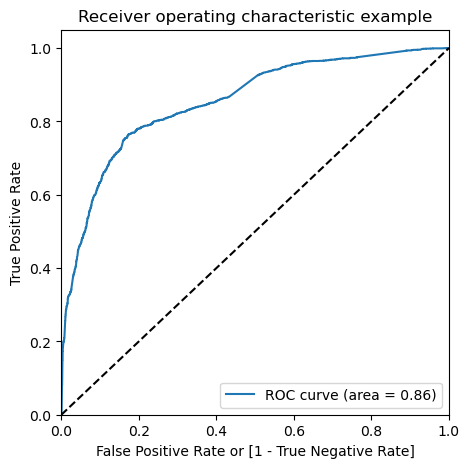

In [507]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

In [509]:
#Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.385930,1871,1,1,1,1,0,0,0,0,0,0
6795,0,0.160661,6795,1,1,0,0,0,0,0,0,0,0
3516,0,0.232481,3516,1,1,1,0,0,0,0,0,0,0
8105,0,0.642904,8105,1,1,1,1,1,1,1,0,0,0
3934,0,0.200519,3934,1,1,1,0,0,0,0,0,0,0


Accuracy, Senstivity and Specificity 

In [512]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.569728  0.965126  0.326087
0.2   0.2  0.657699  0.925791  0.492504
0.3   0.3  0.786951  0.787105  0.786857
0.4   0.4  0.801639  0.717356  0.853573
0.5   0.5  0.802876  0.658556  0.891804
0.6   0.6  0.789734  0.574615  0.922289
0.7   0.7  0.768553  0.479319  0.946777
0.8   0.8  0.732220  0.337388  0.975512
0.9   0.9  0.710111  0.255474  0.990255


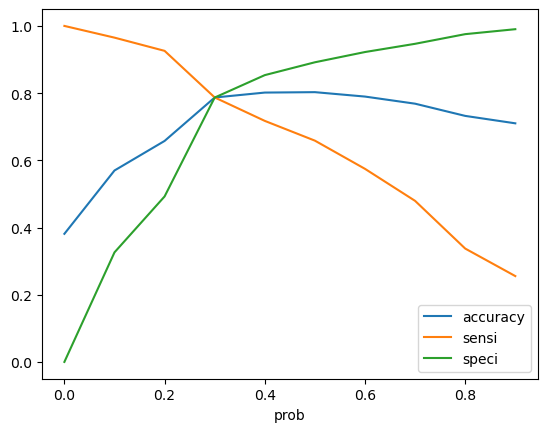

In [514]:
#Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

According the the curve, 0.3 seems like ideal optimal point 

In [517]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_probability.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
1871,0,0.385930,1871,1,1,1,1,0,0,0,0,0,0,1
6795,0,0.160661,6795,1,1,0,0,0,0,0,0,0,0,0
3516,0,0.232481,3516,1,1,1,0,0,0,0,0,0,0,0
8105,0,0.642904,8105,1,1,1,1,1,1,1,0,0,0,1
3934,0,0.200519,3934,1,1,1,0,0,0,0,0,0,0,0


In [519]:
#Checking the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7869511440940012

In [523]:
#Creating confusion matrix to find all the metrics
confusion_pr_train=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
confusion_pr_train

array([[3149,  853],
       [ 525, 1941]], dtype=int64)

In [527]:
TP = confusion_pr_train[1,1] # true positive 
TN = confusion_pr_train[0,0] # true negatives
FP = confusion_pr_train[0,1] # false positives
FN = confusion_pr_train[1,0] # false negatives

In [529]:
# Checking the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7871046228710462

In [539]:
#Checking the specificity of our logistic regression model
TN / float(TN+FP)

0.7868565717141429

In [533]:
# Calculate false postive rate - predicting converted when leads have not been converted
print(FP/ float(TN+FP))

0.21314342828585708


In [541]:
#Calculation True Postitive rate - correct prediction of lead conversions
print(TP/ float(TP+FN))

0.7871046228710462


In [535]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6947029348604151


In [537]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8571039738704409


Precision and Recall

In [545]:
#Pecision score
Precision_train = round((confusion_pr_train[1,1]/(confusion_pr_train[0,1]+confusion_pr_train[1,1])*100),2)

# Recall score
Recall_train = round((confusion_pr_train[1,1]/(confusion_pr_train[1,0]+confusion_pr_train[1,1])*100),2)

#print both
print('Precision:',Precision_train) 
print('Recall:',Recall_train)     

Precision: 69.47
Recall: 78.71


In [553]:
from sklearn.metrics import precision_score, recall_score

In [561]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.6947029348604151

In [563]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7871046228710462

Precision and Recall TradeOff

In [566]:
from sklearn.metrics import precision_recall_curve

In [568]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(1871    0
 6795    0
 3516    0
 8105    0
 3934    0
        ..
 350     1
 79      1
 8039    1
 6936    0
 5640    0
 Name: Converted, Length: 6468, dtype: int64,
 1871    1
 6795    0
 3516    0
 8105    1
 3934    0
        ..
 350     1
 79      1
 8039    0
 6936    0
 5640    0
 Name: final_predicted, Length: 6468, dtype: int64)

In [570]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

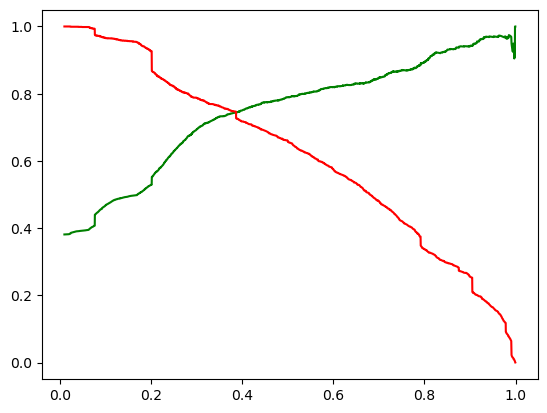

In [572]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Making Prediction on the  Test Set 

In [575]:
# Scalling the variables 'Total Time Spent on Website' with standard scaler and tranforming the X_test dataset
X_test[['Total Time Spent on Website']]=scaler.transform(X_test[['Total Time Spent on Website']])

In [577]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Landing Page Submission,Lead Add Form,Lead Import,Welingak Website,Page_Views_Per_Visit_0 to 5,Page_Views_Per_Visit_5 to 10,Page_Views_Per_Visit_10 to 15,Hospitality Management,Missing,Housewife,Other,Unknown,Working Professional
4269,0,0.964504,0,0,0,0,0,1,0,0,1,0,0,1,0
2376,0,-0.885371,0,1,0,0,0,0,0,0,1,0,0,0,0
7766,0,-0.777416,0,0,0,0,1,0,0,0,0,0,0,0,1
9199,0,-0.885371,0,0,0,0,0,0,0,0,1,0,0,0,0
4359,0,-0.885371,0,1,0,0,0,0,0,0,0,0,0,0,0


In [587]:
# Predicting the test dataset with our final model
test_cols=X_train_7.columns[1:]              # Taking the same column train set has
X_test_final=X_test[test_cols]               # Updating it in the final test set
X_test_final=sm.add_constant(X_test_final)   # Adding constant to the final set set
y_pred_test=logr7.predict(X_test_final)      # Predicting the final test set

In [591]:
y_pred_test[:10]

4269    0.330335
2376    0.791379
7766    0.886385
9199    0.200519
4359    0.904811
9186    0.374682
1631    0.550251
8963    0.287828
8007    0.107869
5324    0.211344
dtype: float64

In [673]:
# Creating a new dataset and saving the prediction values in it
y_test_pred_final=pd.DataFrame({'Converted':y_test.values,'Converted_Probability':y_pred_test,'ID':y_test.index})

y_test_pred_final.head()   # viewing first 5 rows

,Converted,Converted_Probability,ID
4269,1,0.330335,4269
2376,1,0.791379,2376
7766,1,0.886385,7766
9199,0,0.200519,9199
4359,1,0.904811,4359


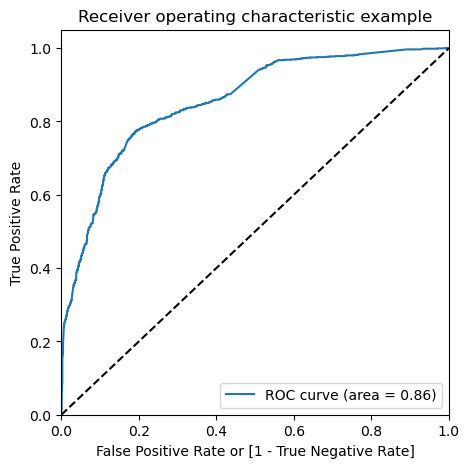

In [675]:
#Calling the roc curve function for plotting
draw_roc(y_test_pred_final.Converted, y_test_pred_final.Converted_Probability)

Model Evaluation 

In [678]:
#Predicting the outcomes with probability cutoff as 0.3 by creating new columns in the final test dataset
y_test_pred_final['Predicted']=y_test_pred_final['Converted_Probability'].map(lambda x:1 if x >0.3 else 0 )  # Predicted value 
y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted
4269,1,0.330335,4269,1
2376,1,0.791379,2376,1
7766,1,0.886385,7766,1
9199,0,0.200519,9199,0
4359,1,0.904811,4359,1


In [692]:
#Checking confusion matrix again 
confusion_pr_test=confusion_matrix(y_test_pred_final.Converted,y_test_pred_final.Predicted)
confusion_pr_test

array([[1292,  385],
       [ 227,  868]], dtype=int64)

In [694]:
TP = confusion_pr_test[1,1] # true positive 
TN = confusion_pr_test[0,0] # true negatives
FP = confusion_pr_test[0,1] # false positives
FN = confusion_pr_test[1,0] # false negatives

In [696]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7926940639269406

In [698]:
# Let us calculate specificity
TN / float(TN+FP)

0.7704233750745378

In [700]:
#  Pecision score
Precision_test = round((confusion_pr_test[1,1]/(confusion_pr_test[0,1]+confusion_pr_test[1,1])*100),2)

#  Recall score
Recall_test = round((confusion_pr_test[1,1]/(confusion_pr_test[1,0]+confusion_pr_test[1,1])*100),2)

#print both
print('Precision:',Precision_test) 
print('Recall:',Recall_test)     

Precision: 69.27
Recall: 79.27


In [702]:
# Checking test set accuracy

Accuracy_test = round(metrics.accuracy_score(y_test_pred_final.Converted,y_test_pred_final.Predicted)*100,2)
print('Test set Accuracy:',Accuracy_test)

Test set Accuracy: 77.92


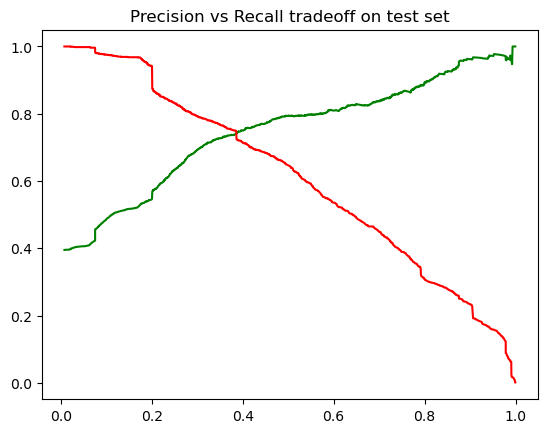

In [706]:
#Creating precision recall curve by crreating three points and plotting

p ,r, thresholds=precision_recall_curve(y_test_pred_final.Converted, y_test_pred_final.Converted_Probability)
plt.title('Precision vs Recall tradeoff on test set')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

In [716]:
#Importing library 
from sklearn.metrics import precision_recall_curve, f1_score

In [718]:
print('F1_Score: ',f1_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)*100)

F1_Score:  73.93526405451448


In [714]:
# Creating new columns for lead number and lead score
# lead score indicates higher score are hotter the leads and lower score are colder the leads.

y_test_pred_final['Lead Number']=df.iloc[y_test_pred_final['ID'],1]

y_test_pred_final['Lead Score']=y_test_pred_final['Converted_Probability'].apply(lambda x:round(x*100))

y_test_pred_final.head(20)

,Converted,Converted_Probability,ID,Predicted,Lead Number,Lead Score
4269,1,0.330335,4269,1,0,33
2376,1,0.791379,2376,1,0,79
7766,1,0.886385,7766,1,0,89
9199,0,0.200519,9199,0,0,20
4359,1,0.904811,4359,1,0,90
9186,1,0.374682,9186,1,0,37
1631,1,0.550251,1631,1,0,55
8963,1,0.287828,8963,0,0,29
8007,0,0.107869,8007,0,0,11
5324,1,0.211344,5324,0,0,21
